In [37]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop
from keras.optimizers import Adam
from keras.utils import np_utils
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *
 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
img_rows, img_cols = 300, 300
img_channels = 1


In [39]:
df = pd.read_csv('/content/drive/MyDrive/image-Sentiment-polarity-DFE.csv')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,which_of_these_sentiment_scores_does_the_above_image_fit_into_best,which_of_these_sentiment_scores_does_the_above_image_fit_into_best:confidence,imageurl,which_of_these_sentiment_scores_does_the_above_image_fit_into_best_gold,which_of_these_sentiment_scores_does_the_above_image_fit_into_best_gold_reason
0,694550568,True,golden,47,NaN,Positive,0.6395,http://farm1.staticflickr.com/20/71235476_3103...,Highly positive\nPositive,"He is smiling. => happy, joy"
1,694550569,True,golden,36,NaN,Positive,0.6458,http://farm4.staticflickr.com/3096/2584485524_...,Highly positive\nPositive,A beautiful scenery. => serenity
2,694550570,True,golden,35,NaN,Negative,0.8420,http://farm3.staticflickr.com/2880/11733997835...,Negative\nHighly negative,"They look serious. => sadness, fear"
3,694550571,True,golden,41,NaN,Positive,0.7216,http://farm4.staticflickr.com/3022/2286937150_...,Highly positive\nPositive,"A cute puppy. => happy, joy"
4,694550572,True,golden,46,NaN,Positive,0.8801,http://farm1.staticflickr.com/163/357381033_d0...,Highly positive\nPositive,"She looks fun. => fun, joy, happy"


In [40]:
df = df.iloc[:10000, :]
# for img in df.imageurl:
#   print(img)

In [8]:
%cd drive/MyDrive/images_sentiment/

/content/drive/MyDrive/images_sentiment


In [41]:
import urllib.request
num = 1
for img in df.imageurl:
  try:
    im = urllib.request.urlretrieve(img, "image-"+str(num)+".jpg")
    num = num+1
  except:
    print('No image of no-'+str(num))   

No image of no-11
No image of no-18
No image of no-31
No image of no-31
No image of no-32
No image of no-33
No image of no-33
No image of no-49
No image of no-62
No image of no-63
No image of no-71
No image of no-74
No image of no-75
No image of no-75
No image of no-118
No image of no-118
No image of no-146
No image of no-152
No image of no-158
No image of no-162
No image of no-176
No image of no-182
No image of no-186
No image of no-187
No image of no-201
No image of no-209
No image of no-209
No image of no-210
No image of no-224
No image of no-226
No image of no-245
No image of no-259
No image of no-263
No image of no-265
No image of no-274
No image of no-274
No image of no-306
No image of no-306
No image of no-347
No image of no-362
No image of no-362
No image of no-362
No image of no-384
No image of no-400
No image of no-404
No image of no-405
No image of no-407
No image of no-411
No image of no-419
No image of no-422
No image of no-434
No image of no-441
No image of no-449
No imag

In [42]:
path1 = "/content/drive/MyDrive/images_sentiment"
path2 = "/content/drive/MyDrive/images_sentiment_resized"

listing = os.listdir(path1) 
num_samples=size(listing)
print(num_samples)

for file in listing:
    im = Image.open(path1 + '//' + file)   
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
    #need to do some more processing here           
    gray.save(path2 +'//' +  file, "JPEG")

8100


(8100, 90000)
(8100,)


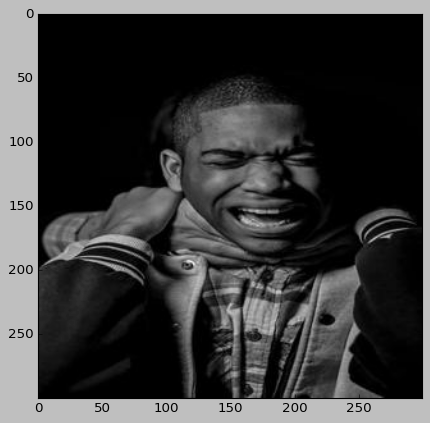

In [43]:
imlist = os.listdir(path2)

im1 = array(Image.open(path2 + '//'+ imlist[0]))
m,n = im1.shape[0:2]
imnbr = len(imlist)

immatrix = array([array(Image.open(path2 + '//'+ im2)).flatten()
              for im2 in imlist],'f')
                
label=np.ones((num_samples,),dtype = int)
label[0:1260]=0
label[1260:2716]=1
label[2716:]=2
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

img=immatrix[167].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')
print (train_data[0].shape)
print (train_data[1].shape)

In [44]:
batch_size = 32
nb_classes = 3
nb_epoch = 20

nb_filters = 32
nb_pool = 2
nb_conv = 3

In [45]:
(X, y) = (train_data[0],train_data[1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (6480, 1, 300, 300)
6480 train samples
1620 test samples


label :  [0. 0. 1.]


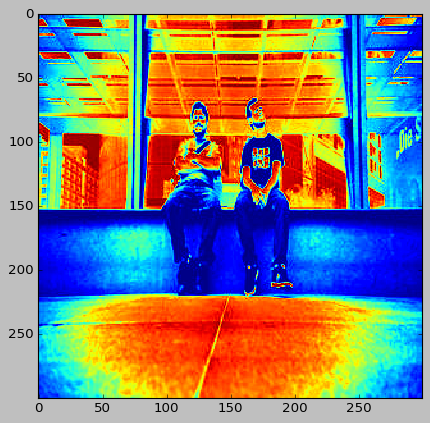

In [46]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

i = 128 #original 256
plt.imshow(X_train[i, 0], interpolation='nearest')
print("label : ", Y_train[i,:])

In [47]:
model = Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        padding='same',
                        input_shape=(1, img_rows, img_cols)))
 
convout1 = Activation('relu')
model.add(convout1)
 
model.add(Convolution2D(nb_filters, nb_conv, nb_conv, padding = 'same'))
convout2 = Activation('relu')
model.add(convout2)
 
model.add(Convolution2D(nb_filters, nb_conv, nb_conv, padding = 'same'))
convout3 = Activation('relu')
model.add(convout3)
 
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool) , padding = 'same'))
model.add(Dropout(0.5))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [48]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
            verbose=1, validation_data=(X_test, Y_test))

hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
              verbose=1, validation_split=0.2)

Epoch 1/20
203/203 [==============================] - 13s 62ms/step - loss: 1.0937 - accuracy: 0.3873 - val_loss: 1.0909 - val_accuracy: 0.5302
Epoch 2/20
203/203 [==============================] - 12s 61ms/step - loss: 1.0820 - accuracy: 0.4840 - val_loss: 1.0783 - val_accuracy: 0.6599
Epoch 3/20
203/203 [==============================] - 12s 62ms/step - loss: 1.0700 - accuracy: 0.5495 - val_loss: 1.0626 - val_accuracy: 0.6617
Epoch 4/20
203/203 [==============================] - 13s 62ms/step - loss: 1.0502 - accuracy: 0.6000 - val_loss: 1.0405 - val_accuracy: 0.6617
Epoch 5/20
203/203 [==============================] - 13s 62ms/step - loss: 1.0238 - accuracy: 0.6292 - val_loss: 1.0122 - val_accuracy: 0.6617
Epoch 6/20
203/203 [==============================] - 13s 62ms/step - loss: 1.0001 - accuracy: 0.6427 - val_loss: 0.9820 - val_accuracy: 0.6617
Epoch 7/20
203/203 [==============================] - 13s 62ms/step - loss: 0.9707 - accuracy: 0.6560 - val_loss: 0.9535 - val_accuracy:

In [49]:
print(hist.history)

{'loss': [0.9104043245315552, 0.9049955606460571, 0.9046262502670288, 0.9053188562393188, 0.9033159017562866, 0.9048070311546326, 0.9016075730323792, 0.9066143035888672, 0.905847430229187, 0.9054979681968689, 0.9065104126930237, 0.9068326354026794, 0.904245138168335, 0.9018967151641846, 0.9049053192138672, 0.9037351012229919, 0.9069989919662476, 0.901454508304596, 0.9063848853111267, 0.904256284236908], 'accuracy': [0.6589506268501282, 0.6585648059844971, 0.6591435074806213, 0.6591435074806213, 0.6591435074806213, 0.6591435074806213, 0.6593364477157593, 0.6595293283462524, 0.6593364477157593, 0.6593364477157593, 0.6593364477157593, 0.6591435074806213, 0.6593364477157593, 0.6595293283462524, 0.6593364477157593, 0.6589506268501282, 0.6595293283462524, 0.6593364477157593, 0.6593364477157593, 0.6595293283462524], 'val_loss': [0.8550357818603516, 0.8550339937210083, 0.8549747467041016, 0.8549447655677795, 0.8548905253410339, 0.8548085689544678, 0.8545421361923218, 0.8545488715171814, 0.8545

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


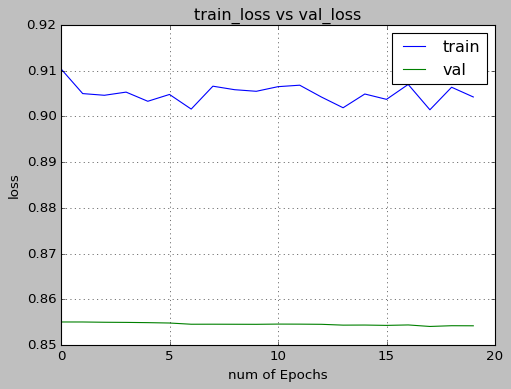

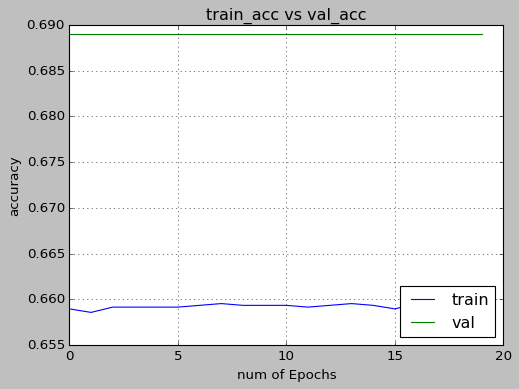

In [50]:
# visualizing losses and accuracy

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(nb_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print(plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [51]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print(model.predict_classes(X_test[1:5]))
print(Y_test[1:5])

Test score: 0.8833780288696289
Test accuracy: 0.6617283821105957
[2 2 2 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [54]:
# Confusion Matrix

from sklearn.metrics import classification_report,confusion_matrix

Y_pred = model.predict(X_test)
#print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
#print(y_pred)
  

p=model.predict_proba(X_test) # to predict probability

target_names = ['class 0(Negative)','class 0(Neutral)', 'class 2(Positive)']
print(classification_report(np.argmax(Y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

                   precision    recall  f1-score   support

class 0(Negative)       0.00      0.00      0.00       255
 class 0(Neutral)       0.00      0.00      0.00       293
class 2(Positive)       0.66      1.00      0.80      1072

         accuracy                           0.66      1620
        macro avg       0.22      0.33      0.27      1620
     weighted avg       0.44      0.66      0.53      1620

[[   0    0  255]
 [   0    0  293]
 [   0    0 1072]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix,accuracy_score
print("F1-score: {0}".format(f1_score(y_pred, y_test,pos_label='positive',average='micro') ) )
print("Precision: ",precision_score(y_pred, y_test,pos_label='positive',
                                           average='micro'))
print("Recall: ",recall_score(y_pred, y_test,pos_label='positive',
                                           average='micro'))
print("Accuracy: ",accuracy_score(y_pred,y_test))

F1-score: 0.6617283950617284
Precision:  0.6617283950617284
Recall:  0.6617283950617284
Accuracy:  0.6617283950617284


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
